## P1
$$
\begin{align*}
    min_{\delta}.   & ~~ ||\delta|| \\
    s.t.            & ~~ f_j(x + \delta) \geq f_k(x+\delta) ~~ \forall k \neq j
\end{align*}
$$




# TODO

## P2
$$
\begin{align*}
    max_{\delta}.   & ~~ f_j(x + \delta) - max_{k\neq j} f_k(x+\delta) \\
    s.t.            & ~~ ||\delta|| \leq \epsilon \\
    \Updownarrow \\
    min_{\delta}.   & ~~ max_{k\neq j} f_k(x+\delta) - f_j(x + \delta) \\
    s.t.            & ~~ ||\delta|| \leq \epsilon \\
\end{align*}
$$

## P3
$$
\begin{align*}
    min_{\delta}.   & ~~  max_{k\neq j} \{f_k(x+\delta) -  f_j(x+\delta) \} + \lambda ||\delta||
\end{align*}
$$
We can add $||\delta||$ as a regularization and control the magnitude by modifying $\lambda$


## P4
$$
\begin{align*}
    \text{find}_{\delta}. & ~~  ||\delta|| \\
    s.t. & ~~ \max_{j\neq i} f(x + \delta) \geq f_i(x + \delta) \\
        & ~~ ||\delta|| \leq \epsilon
\end{align*}
$$

## P5
We can use subgradient method with Adam [^fn1] acceleration. We choose step size $t=1e-3$,
Adam parameter $\beta_1=0.99$, $\beta_2=0.999$. Once the objective of is negative,
the score of the target label is larger than the score for all other classes,
then the attack is success.

[^fn1]: Kingma, Diederik P., and Jimmy Ba. "Adam: A method for stochastic optimization." arXiv preprint arXiv:1412.6980 (2014).

## P6
Implementation in impl.gradient_attack

## P7
Implementation in impl.load

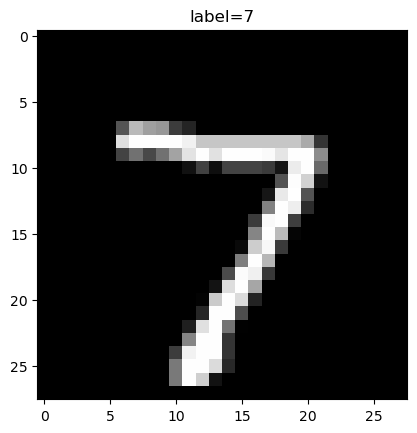

In [2]:
import impl2

X,y = impl2.load()
for i in range(1):
    impl2.plot(X[i].detach().numpy(), y[i].item())


## P8
Implementation in impl2.plot

## P9

tensor(0.0778, grad_fn=<MaxBackward1>)


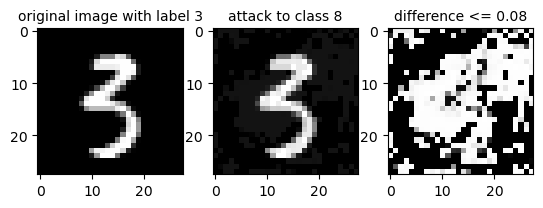

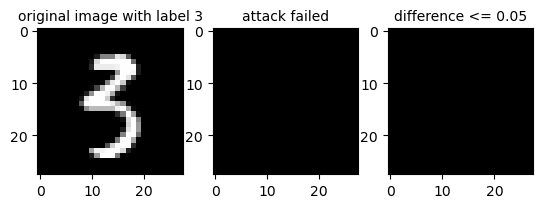

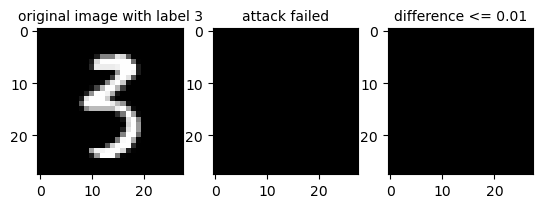

tensor(0.0778, grad_fn=<MaxBackward1>)


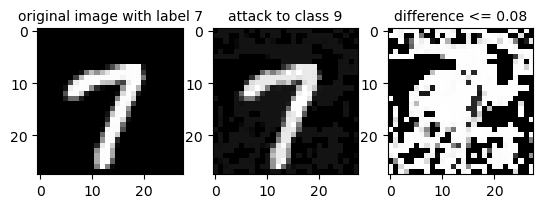

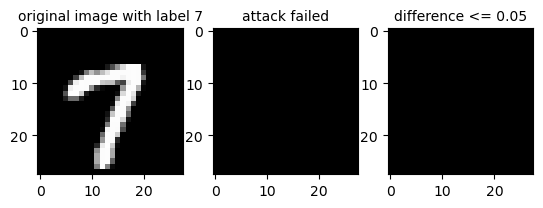

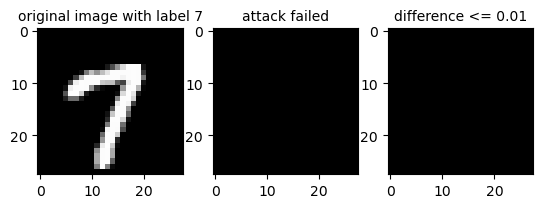

tensor(0.0416, grad_fn=<MaxBackward1>)


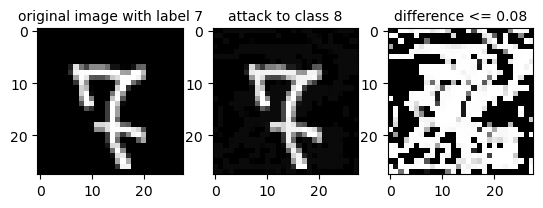

tensor(0.0416, grad_fn=<MaxBackward1>)


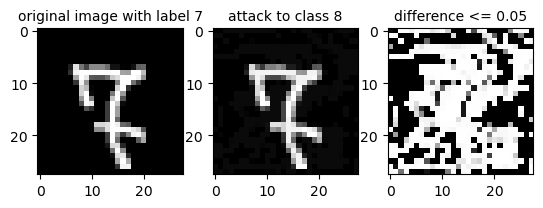

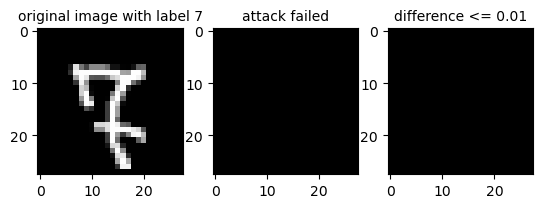

tensor(0.0588, grad_fn=<MaxBackward1>)


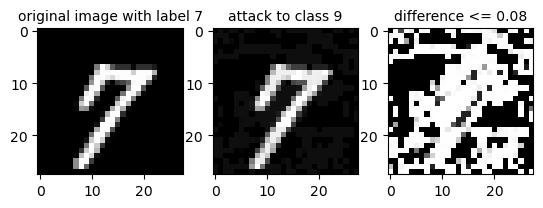

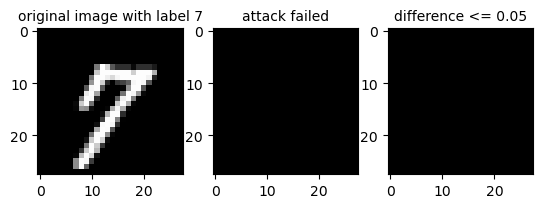

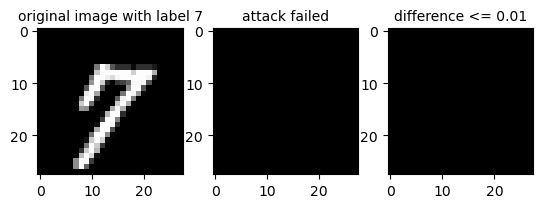

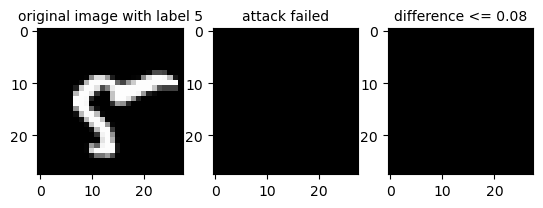

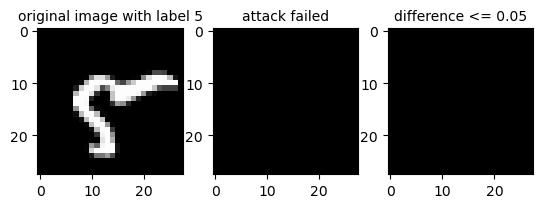

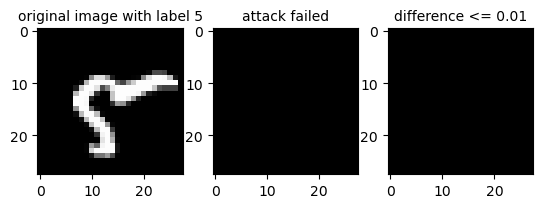

In [2]:
from impl2 import p9
p9()

## P10

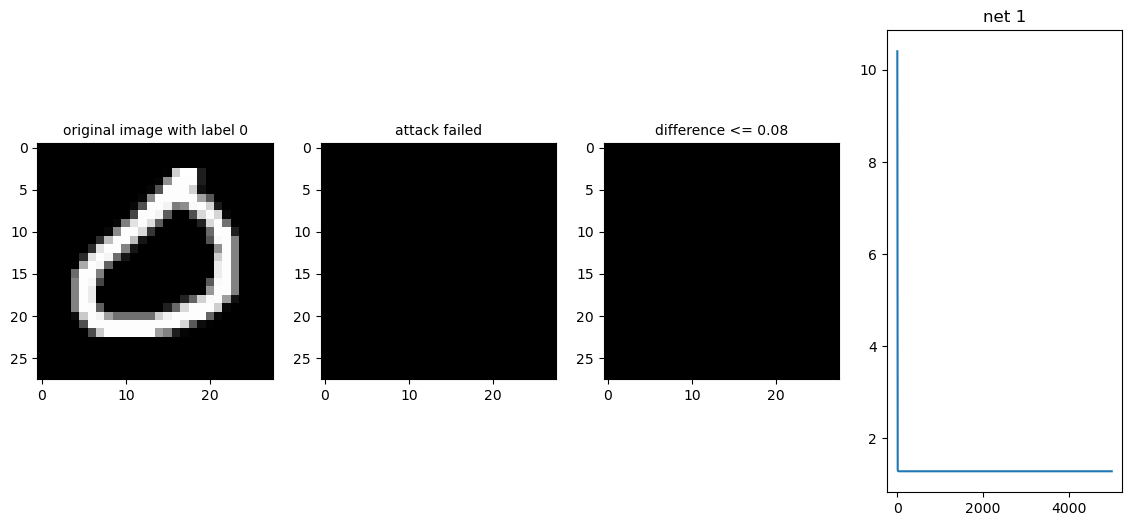

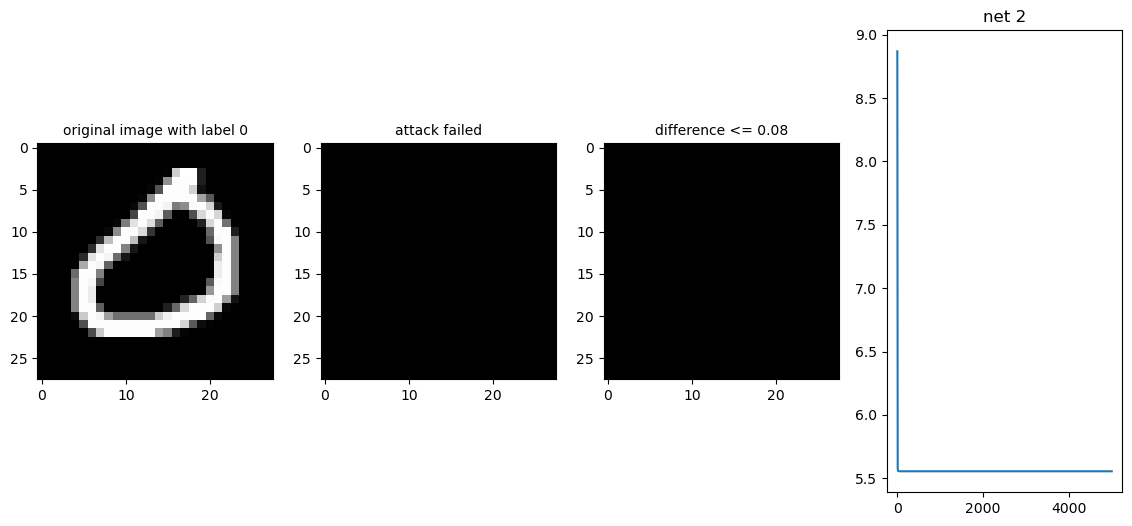

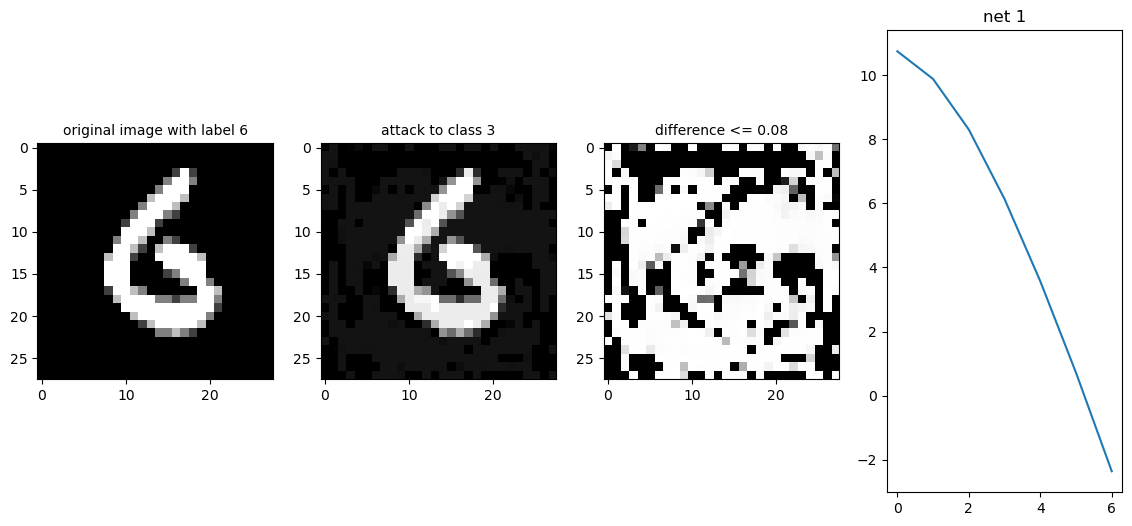

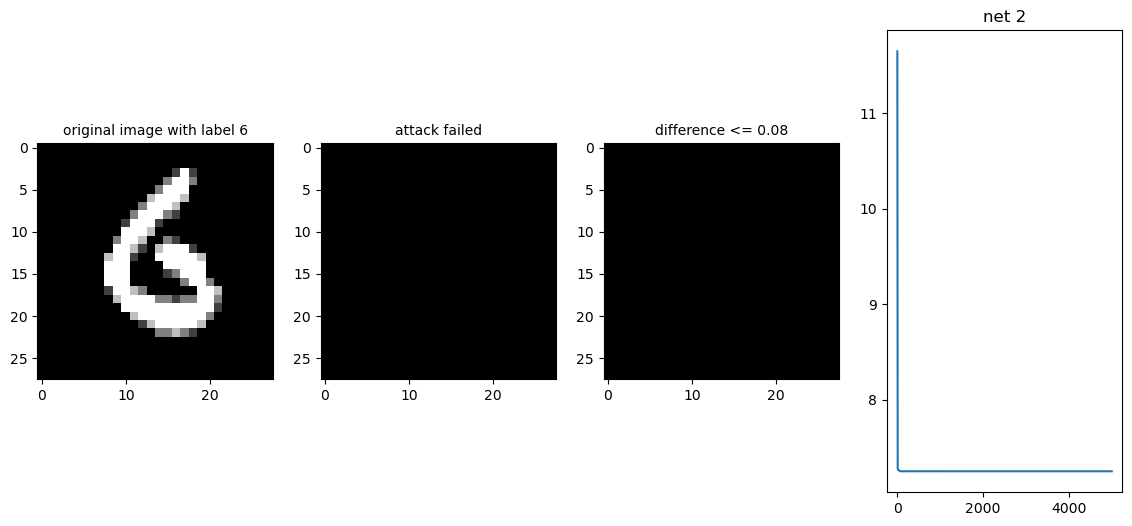

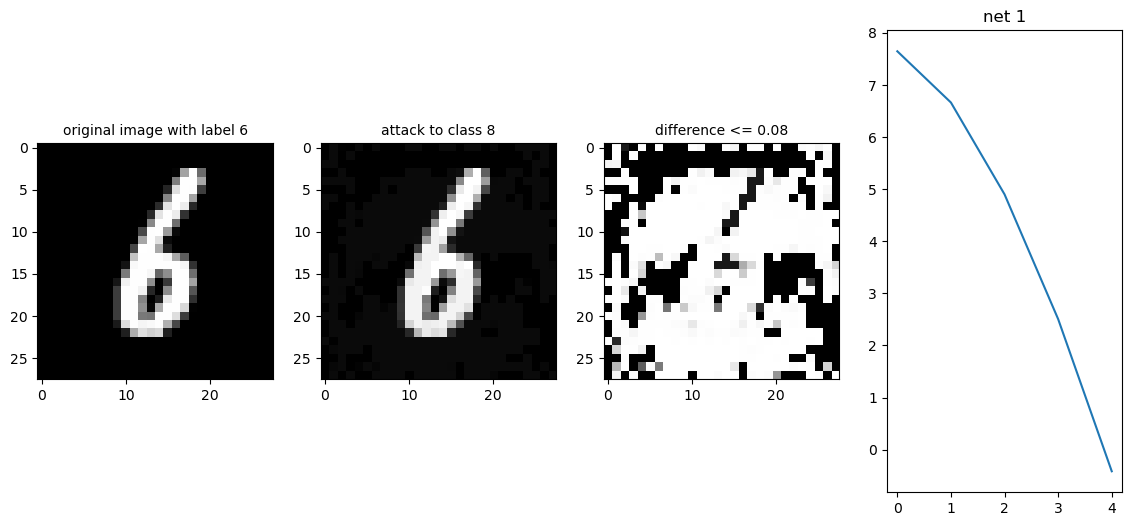

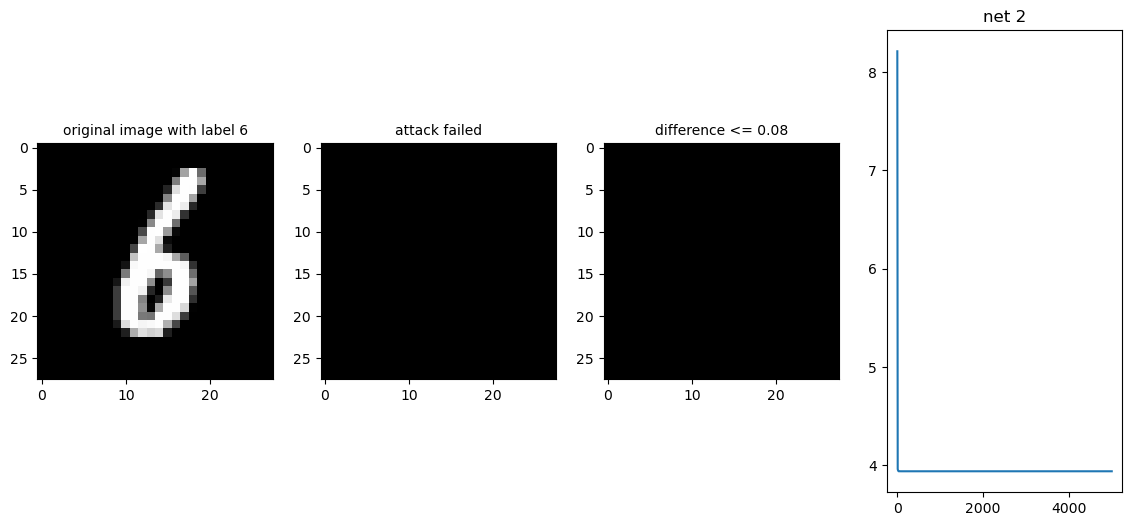

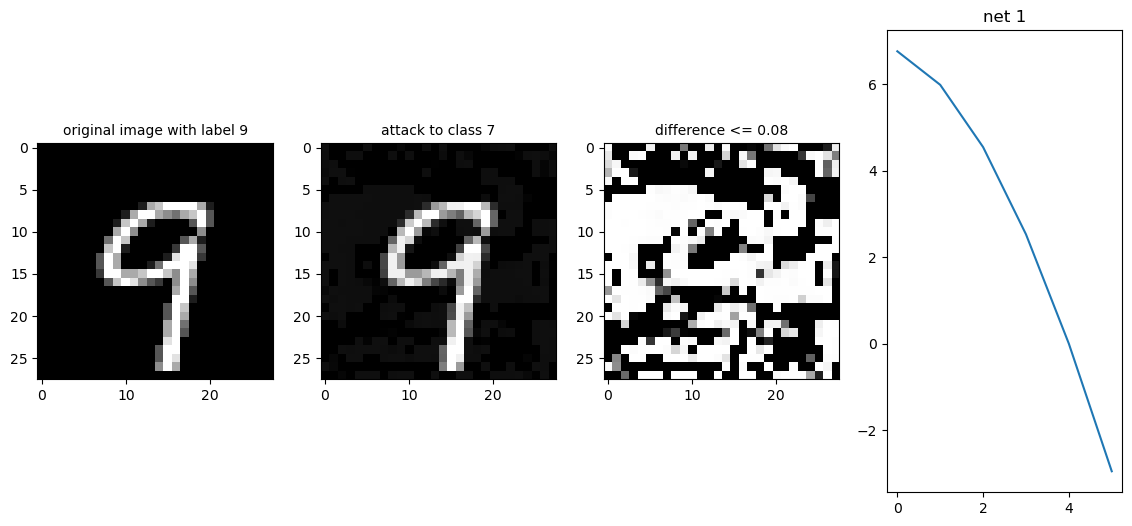

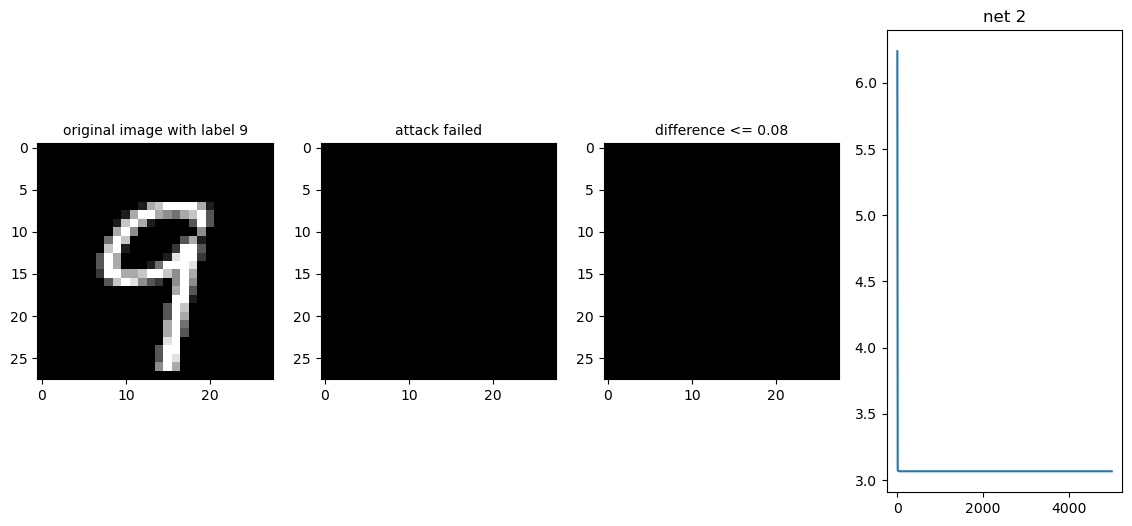

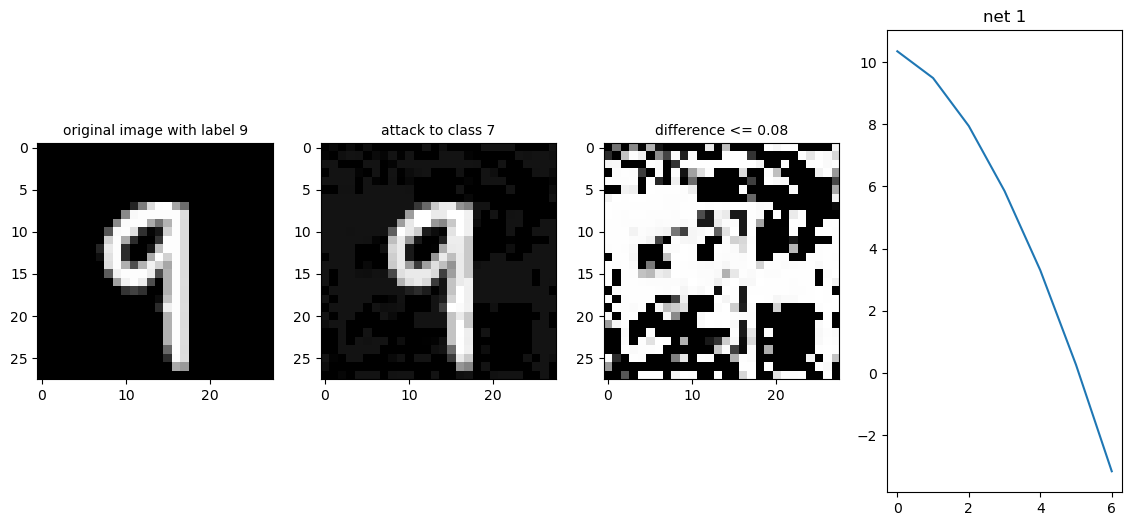

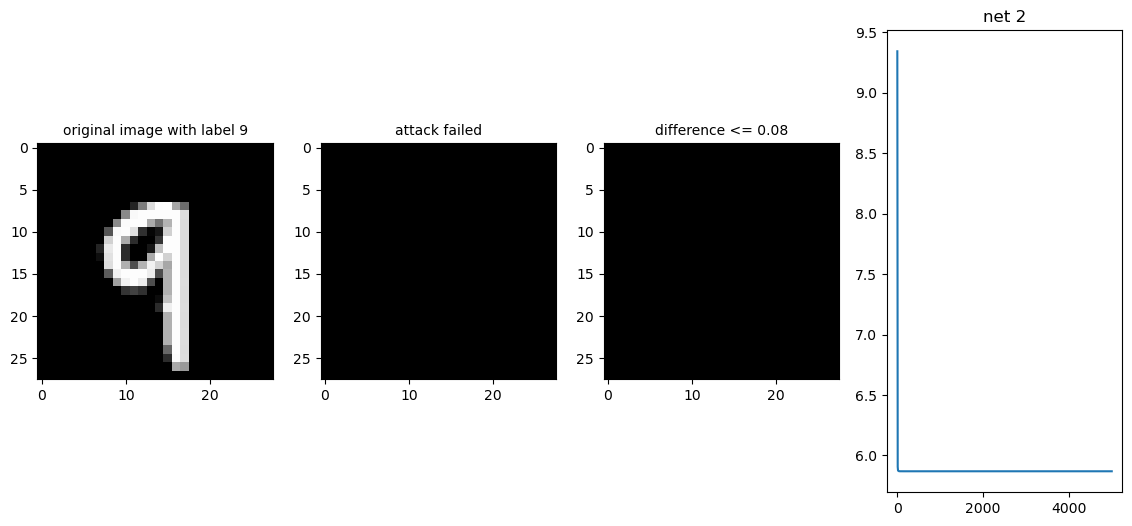

In [3]:
from impl2 import p10
p10()

## P11
$$
\begin{align*}
    \min_{\delta}. & ~~ f_{C(x)}(x + \delta) - \max_{j\neq C(x)}f_j(x+\delta) \\
    s.t.    & ~~ ||\delta||_{\infty} \leq \epsilon
\end{align*}
$$

## P12
If the lower bound is positive, then the optimal of the problem must be positive, thus we can certify the robustness of the neural net. The caveat is, maybe the network is robust (p*>0) but the lower bound is negative. In this case, we cannot certify the robustness of the network.

## P13
Suppose $W \in \mathbb{R}^{m\times n}$, we have $y^0_i = w_i^Tx + b_i$, we can bound $y^0_i$ by solving the two optimizations given the bound of $x$

$$
\begin{align*}
    \min_{z}.  & ~~ w_i^Tz + b_i \\
    s.t.        & ~~ L \leq z \leq U \\
\end{align*}
$$ $$
\begin{align*}
    \max_{z}.  & ~~ w_i^Tz + b_i \\
    s.t.        & ~~ L \leq z \leq U \\

\end{align*}
$$
where $L$ and $U$ are lower and upper bounds for $x$
Both of them are Linear Programs and have analytic solutions.

For the lower bound problem
$$
\begin{align*}
z^*_j = \begin{cases}
    U_j & ~~~ w_{ij} \leq 0 \\
    L_j & ~~~ w_{ij} \geq 0
\end{cases}
\end{align*}
$$

For the upper bound problem
$$
\begin{align*}
z^*_j = \begin{cases}
    U_j & ~~~ w_{ij} \geq 0 \\
    L_j & ~~~ w_{ij} \leq 0
\end{cases}
\end{align*}
$$

## 14
Given the upper and lower bound of $ \underline{y^0} \leq y^0 \leq \bar{y^0}$, the bounds for the post-activation is
$$
\begin{align*}
    \underline{x^1} = \max \{ \underline{y^0}, 0 \} \\
    \bar{x^1} = \max \{ \bar{y^0}, 0 \} \\
\end{align*}
$$

## 15
Given the bound of input $L \leq x \leq U$ where $L = x-\epsilon, U = x-\epsilon$, first compute the bounds for $y^0$ by (13), then compute the bounds for $x^1$ by (14)

## 16

1. Input: Input lower and upper bounds L U
2. Initialize: Ls=[L], Us=[U]
    > for i = 1,2,..,l
    >> compute $\underline{y^i}$ and $\bar{y^i}$ by (13) with bonuds L U
    >> append $\underline{y^i}$ to Ls
    >> append $\bar{y^i}$ to Us
    >> compute $\underline{x^i}$ and $\bar{x^i}$ with (14)
    >> L = $\underline{x^i}$
    >> U = $\bar{x^i}$



## 17

We first compute the bound  $L \leq f(x + \delta) \leq U$ by the algorithm from (16), and then solve the optimization problem

$$
\begin{align*}
    min_x. & ~~ c^Tx \\
    s.t.    & ~~ L \leq x \leq U
\end{align*}
$$
for each $c$ is a row of $C$, which has an analytic solution similar to (13).

And we take the minimum of those lower bound, which is the lower bound of the optimal value over a set of $c$

## 18
implementation in impl.neural_net_gap_lower_bonuds

## P19
For each network, the percentage of certified data points decreases as the attack budget increases.

For each attack budget, net2 has higher certified percentage of data points than net1.



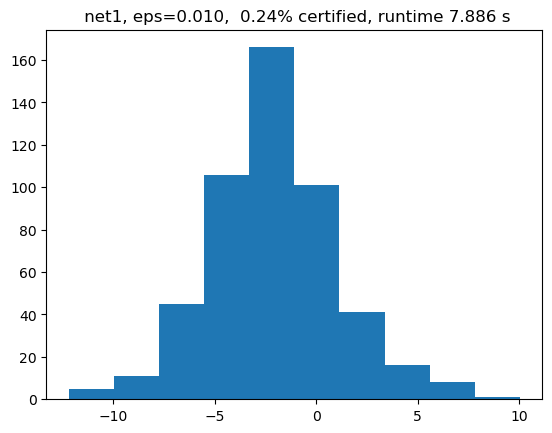

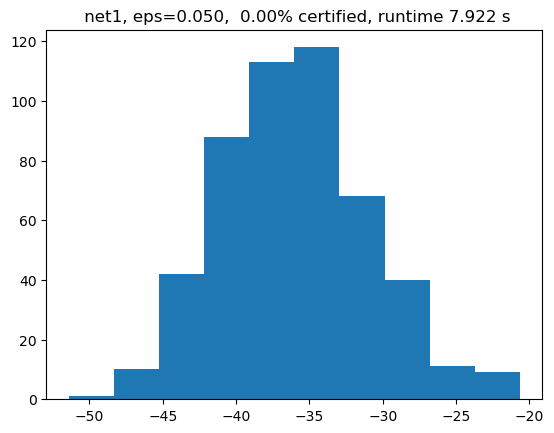

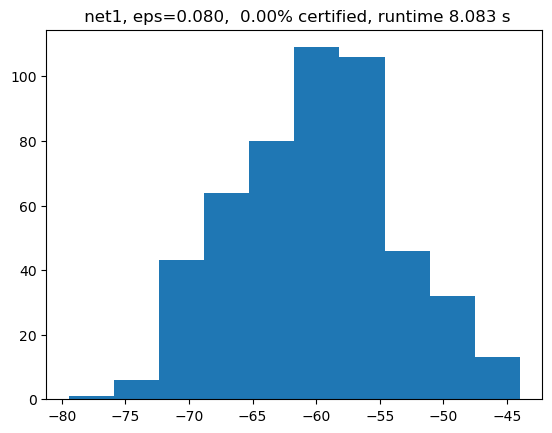

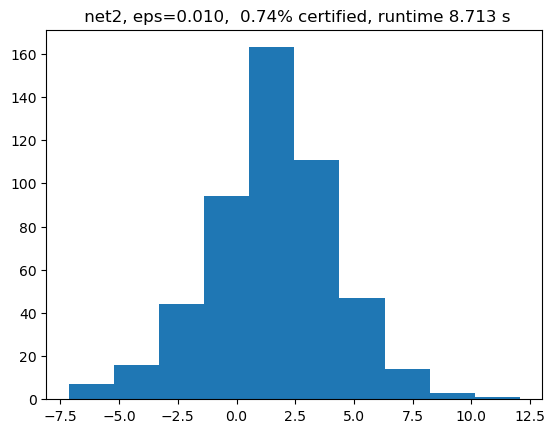

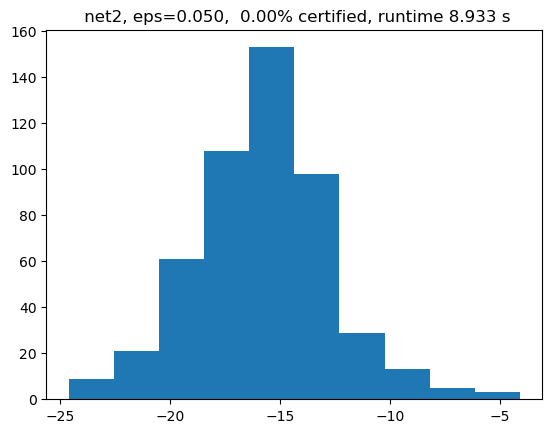

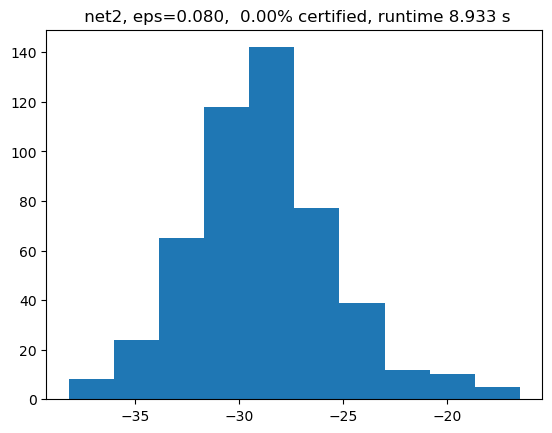

In [2]:
import impl2
impl2.p19()

## 20
Let the
If $\bar{x} \leq 0$, then $C = \{(x,y) | \underline{x} \leq x \leq \bar{x}, y=0 \}$

If $\underline{x} \geq 0$, then $C = \{(x,y) | \underline{x} \leq x \leq \bar{x}, y=x \}$

If $\underline{x} \leq 0 \leq \bar{x}$, then
$
C = \{ (x,y) |
    y \geq 0,
    y \geq x,
    y \leq \frac{\bar{x}}
                {\bar{x} - \underline{x}} x
             - \frac
                {\underline{x} \bar{x}}
                {\bar{x} - \underline{x}}
    \}
$

## 21
$$
\begin{align*}
    \min .  & ~~ c^T y^L \\
    s.t.    & ~~ y^i = w^i x^{i-1} + b^i \\
            & ~~ x^0 = x + \delta \\
            & ~~ \delta \in \Delta \\
            & ~~
                \forall i,j
                \begin{cases}
                    \{
                        \underline{y^i_j} \leq y^i_j \leq \bar{y^i_j}, x^i_j=0
                    \} & ~~ if \bar{y^i_j} \leq 0 \\
                    \{
                        \underline{y^i_j} \leq y^i_j \leq \bar{y^i_j}, x^i_j=y^i_j
                    \} & ~~ if \underline{y^i_j} \geq 0 \\
                    \{
                        x^i_j \geq 0, x^i_j \geq y^i_j
                        x^i_j \leq \frac{\bar{y^i_j}}
                                    {\bar{y^i_j} - \underline{y^i_j}} y
                                - \frac
                                    {\underline{y^i_j} \bar{y^i_j}}
                                    {\bar{y^i_j} - \underline{y^i_j}}
                    \} & ~~ if \underline{y^i_j} \leq 0 \leq \bar{y^i_j}
                \end{cases}
\end{align*}
$$
where the variables $y^i$ are the pre-activation variables, $x^i$ are post-activation variables and $\delta$ is the perturbation. This is a linear program.

The optimal of this problem is a lower bound of the original problem. For each feasible point in the original problem, we can construct a feasible point of the relaxed problem. And the two problems have the same objective value. Thus the optimal of the relaxed problem is less than the optimal of the original problem (minimizing over a larger feaisble region).

## P22,23
Implementation in neural_net_gap_lower_bounds_relaxed

## P24
More data points are certified for net2 than net1. And the lower bound distribution of net2 is shifted right compared to net1.

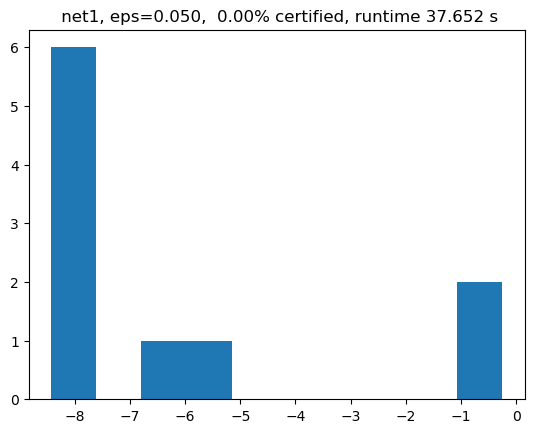

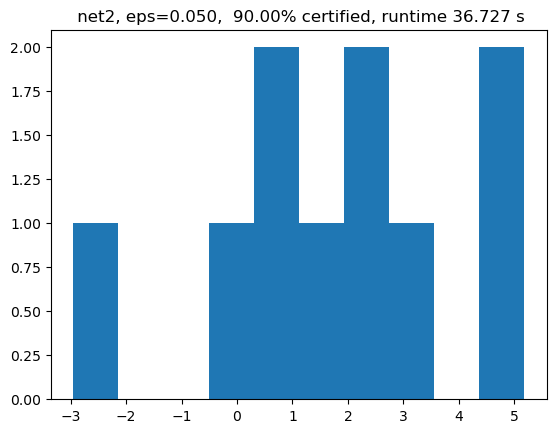

In [1]:
import impl2
impl2.p24()

## P25


We can use branch and bound to either
> 1. certify a data point within some perturbation
> 2. find an adversarial example

Since we constrain the noise to $||\delta|| \leq \epsilon$, the feasible set is a rectangle $ \[x-\epsilon, x + \epsilon \]$. We keep a lower bound and an upper bound over the feasible set. At each iteration, we partition

Initialize $Q = [x - \epsilon, x + \epsilon]$, $Qs=[Q]$, lb=$-\infty$, ub=$\infty$
> While true
> > If lb > 0, we certify the robustness
> > If ub < 0, we find an adversarial example
> > Select a partition $Q \in Qs$, and divide $Q$ in to two subpartitions $Q1, Q2$
> > Compute a lower bound for optimal in this partition by convex hull relaxation
> > Compute an upper bound for optimal by running gradient attack from a randomly sampled data point in this partition
> > Update the global lower bound lb and upper bound ub
> > Add $Q1, Q2$ to Qs

Branch-and-bound is more accurate than bare convex relaxation, but it takes much longer to run.
Since branch-and-bound(BaB) method oftenly takes a long time to converge, we declare failure when branch-and-bound takes more than 150 iterations.
However, we choose some example for which BaB succeed in certifying a robustness while simply convex relaxation fails.